In [ ]:
import pandas as pd
import chardet

# Function to detect the file encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

encodingofcsv = detect_encoding('kickstarter_projects.csv')
df = pd.read_csv('kickstarter_projects.csv', encoding=encodingofcsv)

In [ ]:
import pandas as pd
df = pd.read_csv('kickstarter_projects.csv', encoding='utf-8')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Print the first few rows of the dataset
print(df.head())

# Check the dimensions of the dataset
print("Dataset shape:", df.shape)

# Check the data types of each column
print(df.dtypes)

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())



           ID                                               Name  \
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...   
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country             Launched    Deadline  \
0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31   
1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   

    Goal  Pledged  Backers       State  
0   1000      625       30      Failed  
1  80000       22     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


<Axes: >

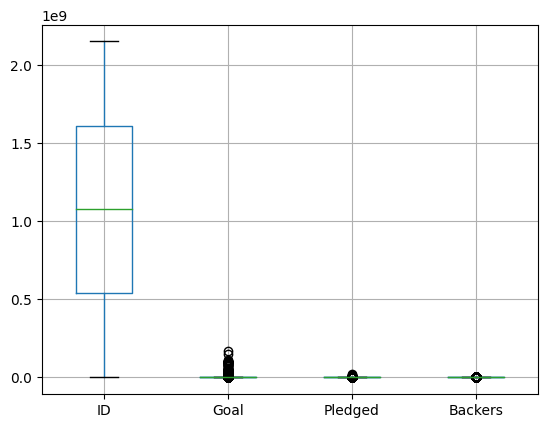

In [ ]:
# separating numerical columns from DataFrame
def get_numerical_columns(data):
    numerical_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
    return numerical_cols

numerical_columns = get_numerical_columns(df)

# Identify outliers
# Plotting boxplots for numerical columns
df[numerical_columns].boxplot()



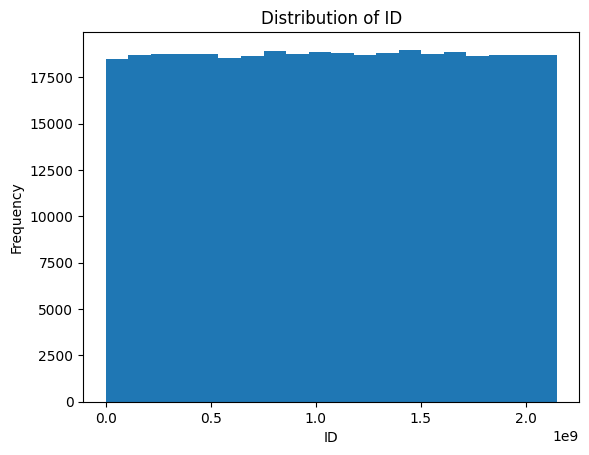

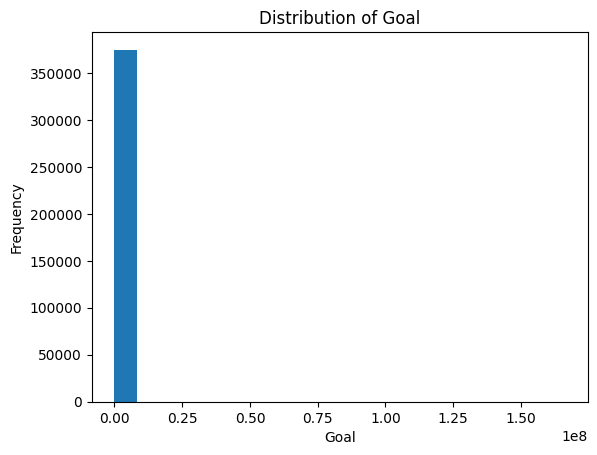

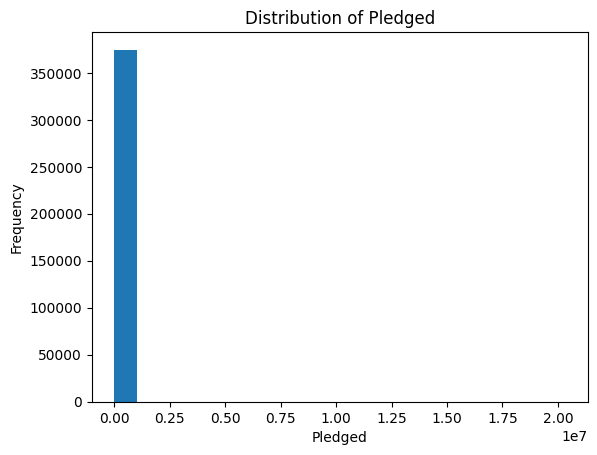

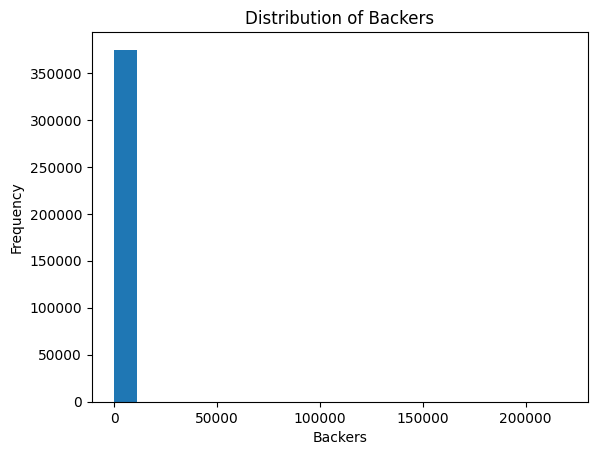

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(data, column):
  plt.hist(data[column], bins=20)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {column}')
  plt.show()

for column in numerical_columns:
  plot_histograms(df, column)


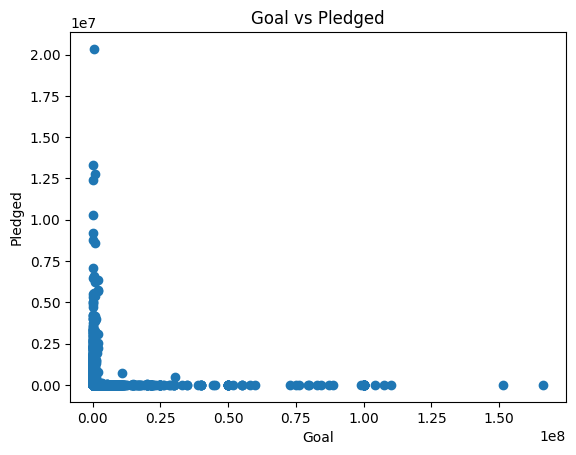

In [ ]:
# Explore relationships between variables
# Example: Scatter plot of 'goal' vs 'pledged'
plt.scatter(df['Goal'], df['Pledged'])
plt.xlabel('Goal')
plt.ylabel('Pledged')
plt.title('Goal vs Pledged')
plt.show()

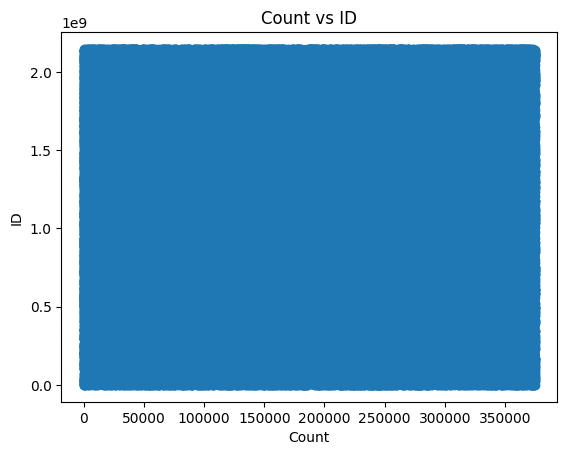

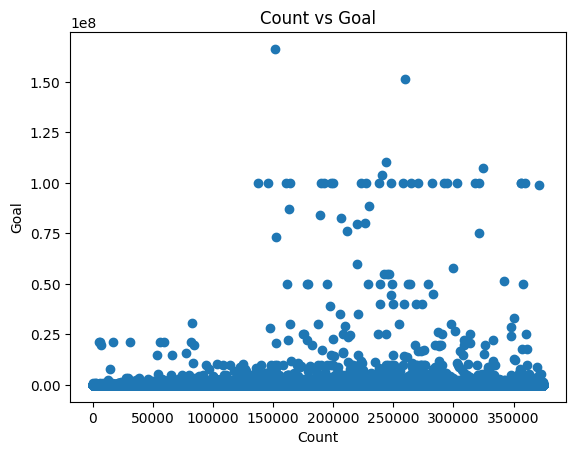

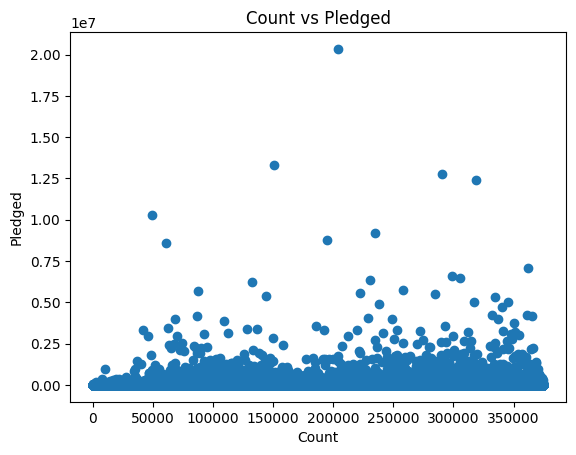

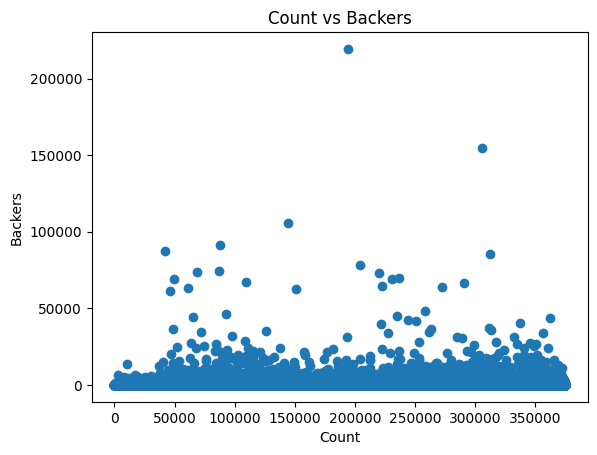

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_counts(data):
    numerical_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
    for column in numerical_cols:
        plt.scatter(data.index, data[column])
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.title(f'Count vs {column}')
        plt.show()

plot_scatter_counts(df)



<ipython-input-10-17e15e5c5386>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


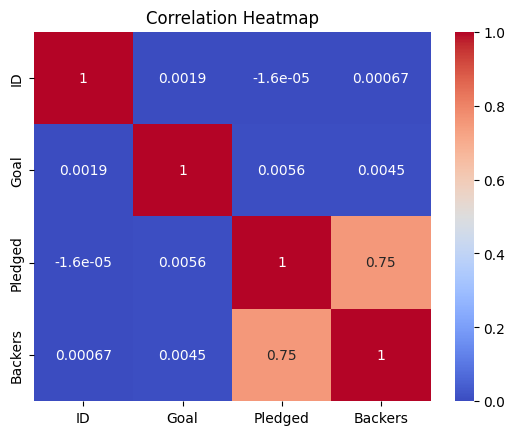

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

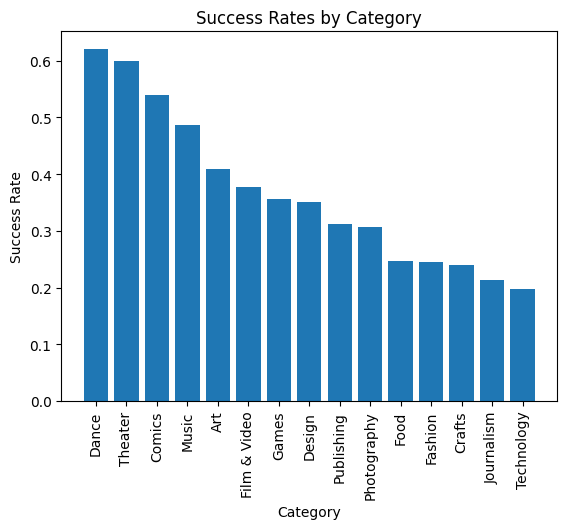

Category
Dance           0.620653
Theater         0.598845
Comics          0.539976
Music           0.486685
Art             0.408866
Film & Video    0.376623
Games           0.355373
Design          0.350873
Publishing      0.312357
Photography     0.306643
Food            0.247368
Fashion         0.245178
Crafts          0.240095
Journalism      0.212873
Technology      0.197562
Name: State, dtype: float64


In [ ]:
def compare_category_success_rates(data):
    category_success_rates = data.groupby('Category')['State'].apply(lambda x: (x == 'Successful').mean())
    category_success_rates = category_success_rates.sort_values(ascending=False)

    # Bar plot to visualize success rates by category
    plt.bar(category_success_rates.index, category_success_rates)
    plt.xlabel('Category')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Category')
    plt.xticks(rotation=90)
    plt.show()

    # Print the success rates for each category
    print(category_success_rates)

compare_category_success_rates(df)


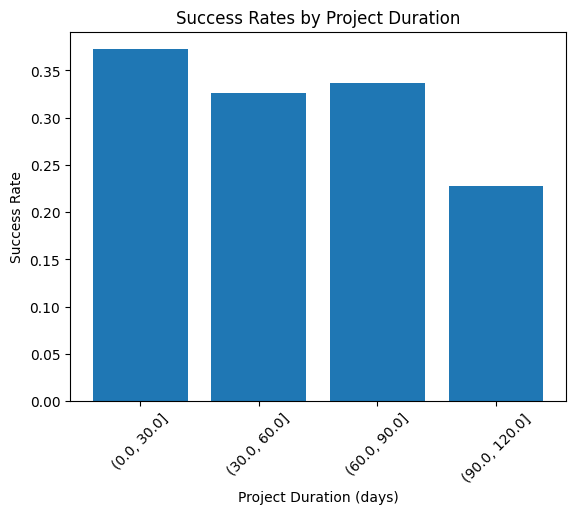

duration_bins
(0.0, 30.0]      0.372426
(30.0, 60.0]     0.326237
(60.0, 90.0]     0.337175
(90.0, 120.0]    0.227273
(120.0, inf]          NaN
Name: State, dtype: float64


In [ ]:
def analyze_duration_success_rate(data):
    # Calculate project duration in days
    data['duration'] = pd.to_datetime(data['Deadline']) - pd.to_datetime(data['Launched'])
    data['duration'] = data['duration'].dt.days

    # Categorize durations into bins (e.g., 0-30 days, 31-60 days, etc.)
    data['duration_bins'] = pd.cut(data['duration'], bins=[0, 30, 60, 90, 120, float('inf')])

    # Calculate success rates for each duration bin
    duration_success_rates = data.groupby('duration_bins')['State'].apply(lambda x: (x == 'Successful').mean())

    # Bar plot to visualize success rates by duration bin
    plt.bar(duration_success_rates.index.astype(str), duration_success_rates)
    plt.xlabel('Project Duration (days)')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Project Duration')
    plt.xticks(rotation=45)
    plt.show()

    # Print the success rates for each duration bin
    print(duration_success_rates)

analyze_duration_success_rate(df)


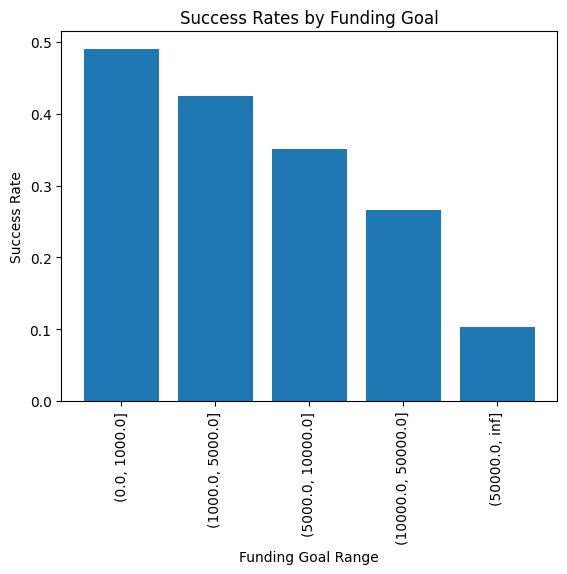

goal_bins
(0.0, 1000.0]         0.490195
(1000.0, 5000.0]      0.425220
(5000.0, 10000.0]     0.350948
(10000.0, 50000.0]    0.265676
(50000.0, inf]        0.103265
Name: State, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_goal_success_rate(data):
    # Categorize funding goals into bins
    data['goal_bins'] = pd.cut(data['Goal'], bins=[0, 1000, 5000, 10000, 50000, float('inf')])

    # Calculate success rates for each goal bin
    goal_success_rates = data.groupby('goal_bins')['State'].apply(lambda x: (x == 'Successful').mean())

    # Bar plot to visualize success rates by goal bin
    plt.bar(goal_success_rates.index.astype(str), goal_success_rates)
    plt.xlabel('Funding Goal Range')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Funding Goal')
    plt.xticks(rotation=90)
    plt.show()

    # Print the success rates for each goal bin
    print(goal_success_rates)

analyze_goal_success_rate(df)


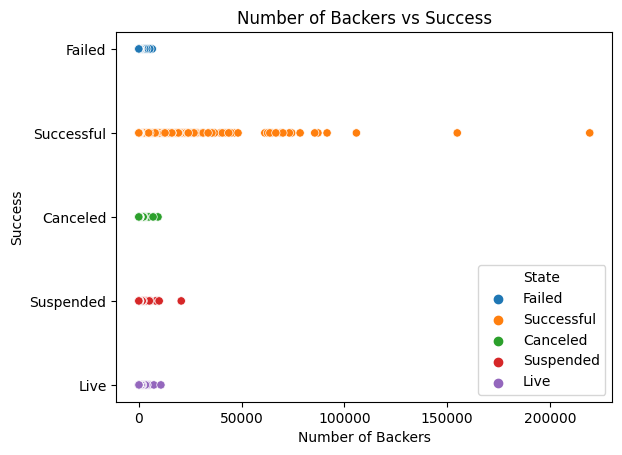

Correlation coefficient: 0.12869152806598258


In [ ]:
def explore_backer_success_correlation(data):
    # Calculate correlation between number of backers and success rate
    correlation = data['Backers'].corr((data['State'] == 'Successful').astype(int))

    # Scatter plot to visualize the relationship
    sns.scatterplot(data=data, x='Backers', y='State', hue='State')
    plt.xlabel('Number of Backers')
    plt.ylabel('Success')
    plt.title('Number of Backers vs Success')
    plt.show()

    # Print the correlation coefficient
    print("Correlation coefficient:", correlation)


explore_backer_success_correlation(df)


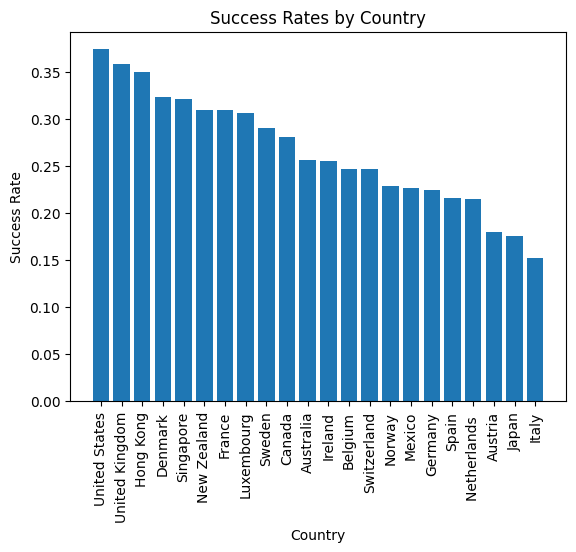

Country
United States     0.373521
United Kingdom    0.358380
Hong Kong         0.349515
Denmark           0.323450
Singapore         0.320721
New Zealand       0.309606
France            0.308949
Luxembourg        0.306452
Sweden            0.289698
Canada            0.280157
Australia         0.256410
Ireland           0.255240
Belgium           0.246353
Switzerland       0.246053
Norway            0.228814
Mexico            0.226027
Germany           0.224646
Spain             0.216169
Netherlands       0.215132
Austria           0.179229
Japan             0.175000
Italy             0.152536
Name: State, dtype: float64


In [ ]:
def analyze_country_success_rate(data):
    country_success_rates = data.groupby('Country')['State'].apply(lambda x: (x == 'Successful').mean())
    country_success_rates = country_success_rates.sort_values(ascending=False)

    # Bar plot to visualize success rates by country
    plt.bar(country_success_rates.index, country_success_rates)
    plt.xlabel('Country')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Country')
    plt.xticks(rotation=90)
    plt.show()

    # Print the success rates for each country
    print(country_success_rates)


analyze_country_success_rate(df)


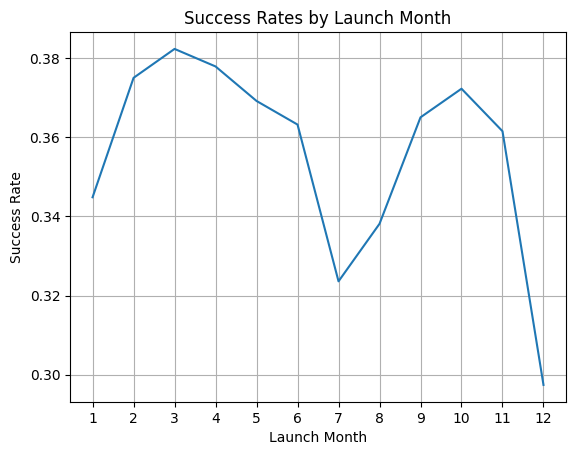

launch_month
1     0.344840
2     0.375017
3     0.382322
4     0.377893
5     0.369174
6     0.363207
7     0.323600
8     0.338136
9     0.365034
10    0.372268
11    0.361531
12    0.297427
Name: State, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_launch_time_success_rate(data):
    # Extract the launch month from the launch date
    data['launch_month'] = pd.to_datetime(data['Launched']).dt.month

    # Calculate success rates for each launch month
    month_success_rates = data.groupby('launch_month')['State'].apply(lambda x: (x == 'Successful').mean())

    # Line plot to visualize success rates by launch month
    plt.plot(month_success_rates.index, month_success_rates)
    plt.xlabel('Launch Month')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Launch Month')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

    # Print the success rates for each launch month
    print(month_success_rates)


analyze_launch_time_success_rate(df)


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-23-e46c06cdcd5a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description'] = data['Name'].str.lower().str.replace(r'[^a-zA-Z\s]', '')


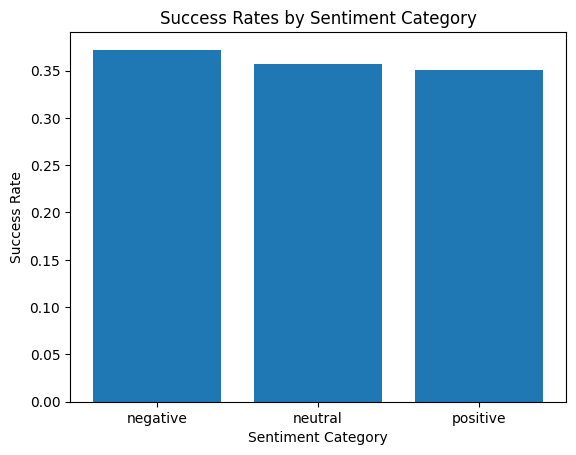

sentiment_category
negative    0.372017
neutral     0.357414
positive    0.350420
Name: State, dtype: float64


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment_success_rate(data):
    # Preprocess project descriptions
    nltk.download('stopwords')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    data['description'] = data['Name'].str.lower().str.replace(r'[^a-zA-Z\s]', '')
    data['description'] = data['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

    # Sentiment analysis
    sid = SentimentIntensityAnalyzer()
    data['sentiment'] = data['description'].apply(lambda x: sid.polarity_scores(x)['compound'])
    data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

    # Calculate success rates for each sentiment category
    sentiment_success_rates = data.groupby('sentiment_category')['State'].apply(lambda x: (x == 'Successful').mean())

    # Bar plot to visualize success rates by sentiment category
    plt.bar(sentiment_success_rates.index, sentiment_success_rates)
    plt.xlabel('Sentiment Category')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Sentiment Category')
    plt.show()

    # Print the success rates for each sentiment category
    print(sentiment_success_rates)

analyze_sentiment_success_rate(df)


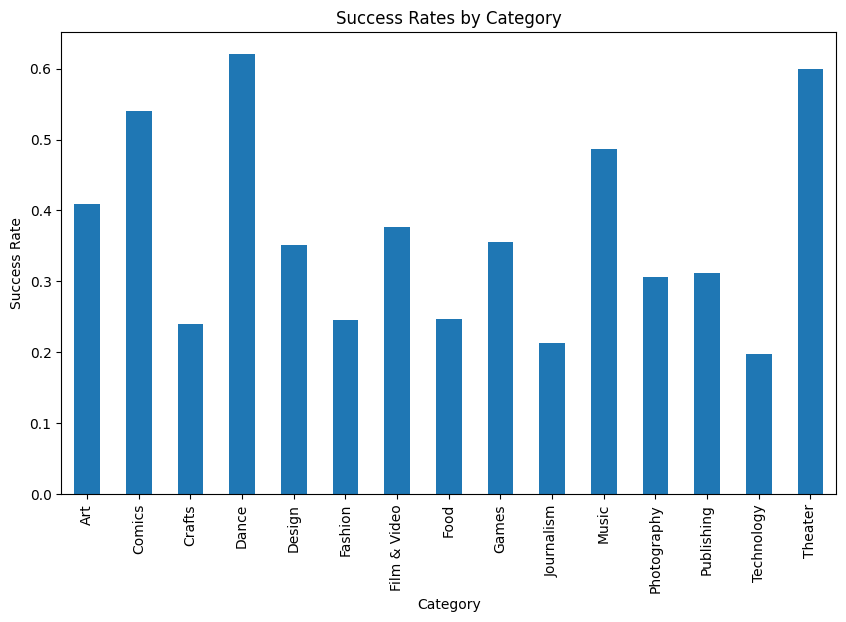

Category with the highest success percentage: Dance
Highest success percentage: 0.6206530395540217
Number of successful projects: 133851


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_category_success(data):
    # Calculate success rates for each category
    category_success_rates = data.groupby('Category')['State'].apply(lambda x: (x == 'Successful').mean())

    # Find the category with the highest success percentage
    highest_success_category = category_success_rates.idxmax()
    highest_success_percentage = category_success_rates.max()

    # Count the number of successful projects
    successful_projects_count = (data['State'] == 'Successful').sum()

    # Plot the success rates by category
    category_success_rates.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Category')
    plt.ylabel('Success Rate')
    plt.title('Success Rates by Category')
    plt.xticks(rotation=90)
    plt.show()

    # Print the results
    print("Category with the highest success percentage:", highest_success_category)
    print("Highest success percentage:", highest_success_percentage)
    print("Number of successful projects:", successful_projects_count)


analyze_category_success(df)


In [ ]:
def analyze_goal_completion(data):
    # Filter projects with a goal over $1,000 USD
    filtered_data = data[data['Goal'] > 1000].copy()

    # Calculate Goal Completion %
    filtered_data['goal_completion'] = filtered_data['Pledged'] / filtered_data['Goal']

    # Find project with the highest Goal Completion %
    max_goal_completion_project = filtered_data.loc[filtered_data['goal_completion'].idxmax()]
    max_goal_completion_pledged = max_goal_completion_project['Pledged']

    # Print the results
    print("Project with the highest Goal Completion %:")
    print("Project Name:", max_goal_completion_project['Name'])
    print("Goal Completion %:", max_goal_completion_project['goal_completion'])
    print("Amount Pledged:", max_goal_completion_pledged)


analyze_goal_completion(df)


Project with the highest Goal Completion %:
Project Name: Exploding Kittens
Goal Completion %: 878.2572
Amount Pledged: 8782572


In [ ]:
import matplotlib.pyplot as plt

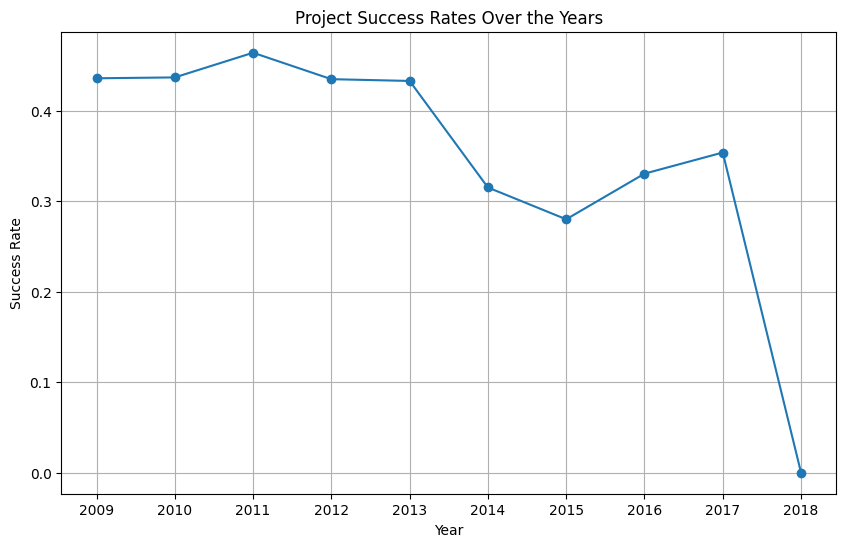

Success Rates by Year:
year
2009    0.435666
2010    0.436638
2011    0.463905
2012    0.434683
2013    0.432733
2014    0.315048
2015    0.279916
2016    0.330321
2017    0.353678
2018    0.000000
Name: State, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_success_rate_trends(data):
    # Extract the year from the launch date
    data['year'] = pd.to_datetime(data['Launched']).dt.year

    # Calculate success rates by year
    success_rates = data.groupby('year')['State'].apply(lambda x: (x == 'Successful').mean())

    # Plot success rates over the years
    plt.figure(figsize=(10, 6))
    plt.plot(success_rates.index, success_rates.values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Success Rate')
    plt.title('Project Success Rates Over the Years')
    plt.xticks(success_rates.index)
    plt.grid(True)
    plt.show()

    # Print the success rates
    print("Success Rates by Year:")
    print(success_rates)

analyze_success_rate_trends(df)


In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


# Preprocess the data
le = LabelEncoder()
df['state_encoded'] = le.fit_transform(df['State'])
df = df[['Category', 'Goal', 'Backers', 'Country', 'state_encoded']]
df = df.dropna()

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Category', 'Country'])

# Split the data into features and target
X = df_encoded.drop('state_encoded', axis=1)
y = df_encoded['state_encoded']

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the top important features
print("Top Important Features:")
print(importance_df.head())

# Identify the top project categories
top_categories = importance_df[importance_df['Feature'].str.startswith('Category')]['Feature'].values
print("Top Project Categories:")
print(top_categories)


Top Important Features:
                Feature  Importance
1               Backers    0.637110
0                  Goal    0.309280
12       Category_Music    0.004965
10       Category_Games    0.004503
15  Category_Technology    0.004212
Top Project Categories:
['Category_Music' 'Category_Games' 'Category_Technology'
 'Category_Theater' 'Category_Design' 'Category_Comics' 'Category_Food'
 'Category_Film & Video' 'Category_Fashion' 'Category_Art'
 'Category_Publishing' 'Category_Dance' 'Category_Crafts'
 'Category_Photography' 'Category_Journalism']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Preprocess the data and select relevant features
# (you may need to adapt this based on your specific dataset)
X = df[['Category', 'Goal', 'Backers', 'Country']]
y = df['State']

# Convert categorical features into numerical representations
X = pd.get_dummies(X, columns=['Category', 'Country'])

# Calculate the duration of the project
df['duration'] = pd.to_datetime(df['Deadline']) - pd.to_datetime(df['Launched'])
df['duration'] = df['duration'].dt.days

# Add the duration column to the feature set
X['duration'] = df['duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Select the model with the highest accuracy
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

# Print the results
print("Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")
print("\nBest Model:", best_model)
print("Best Accuracy:", best_accuracy)



Model Performance:
Logistic Regression: 0.7756898649081247
Decision Tree: 0.7422583605437821
Random Forest: 0.7948438867191668
Gradient Boosting: 0.8244765990140214

Best Model: Gradient Boosting
Best Accuracy: 0.8244765990140214


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Preprocess the data and select relevant features
# (you may need to adapt this based on your specific dataset)
X = df[['Category', 'Goal', 'Backers', 'Country']]
y = df['State']

# Convert categorical features into numerical representations
X = pd.get_dummies(X, columns=['Category', 'Country'])

# Calculate the duration of the project
df['duration'] = pd.to_datetime(df['Deadline']) - pd.to_datetime(df['Launched'])
df['duration'] = df['duration'].dt.days

# Add the duration column to the feature set
X['duration'] = df['duration']

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Perform cross-validation and evaluate the models
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    average_score = scores.mean()
    results[name] = average_score

# Select the model with the highest average cross-validation score
best_model = max(results, key=results.get)
best_score = results[best_model]

# Print the results
print("Model Performance (Cross-Validation):")
for name, score in results.items():
    print(f"{name}: {score}")
print("\nBest Model:", best_model)
print("Best Score:", best_score)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model Performance (Cross-Validation):
Logistic Regression: 0.7679891012662374
Decision Tree: 0.7358430580886367
Random Forest: 0.7882983161652437
Gradient Boosting: 0.8177044978133174

Best Model: Gradient Boosting
Best Score: 0.8177044978133174


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Preprocess the data and select relevant features
X = df[['Category', 'Goal', 'Backers']]
y = df['Pledged']

# Convert categorical features into numerical representations
X = pd.get_dummies(X, columns=['Category'])

# Extract relevant information from the 'Launched' column
df['launched_date'] = pd.to_datetime(df['Launched'])
X['launched_year'] = df['launched_date'].dt.year
X['launched_month'] = df['launched_date'].dt.month
X['launched_day'] = df['launched_date'].dt.day

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Select the model with the lowest MSE
best_model = min(results, key=lambda x: results[x]['MSE'])
best_metrics = results[best_model]

# Print the results
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"R2: {metrics['R2']}")
    print()


Model Performance:
Linear Regression:
MSE: 1828773514.7441897
RMSE: 42764.16156952209
MAE: 6224.4825648039105
R2: 0.6518522562957545

Decision Tree:
MSE: 3773612614.7679315
RMSE: 61429.73721877647
MAE: 5651.341248194863
R2: 0.2816088450246911

Random Forest:
MSE: 1423519017.5035214
RMSE: 37729.55098465289
MAE: 4237.97216265593
R2: 0.7290014700736414

Gradient Boosting:
MSE: 1352514895.580753
RMSE: 36776.5536120604
MAE: 4703.160695896807
R2: 0.7425186851042684



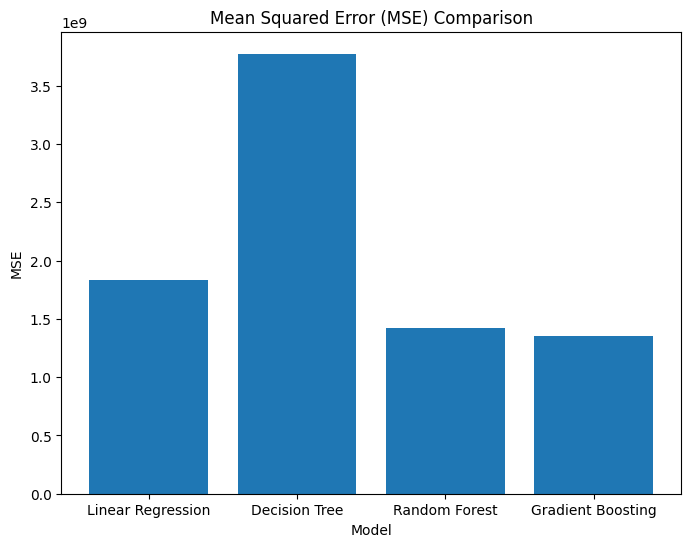

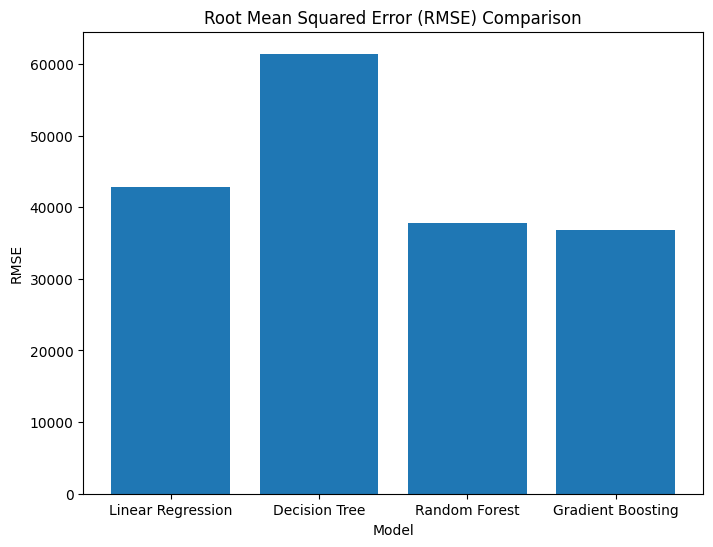

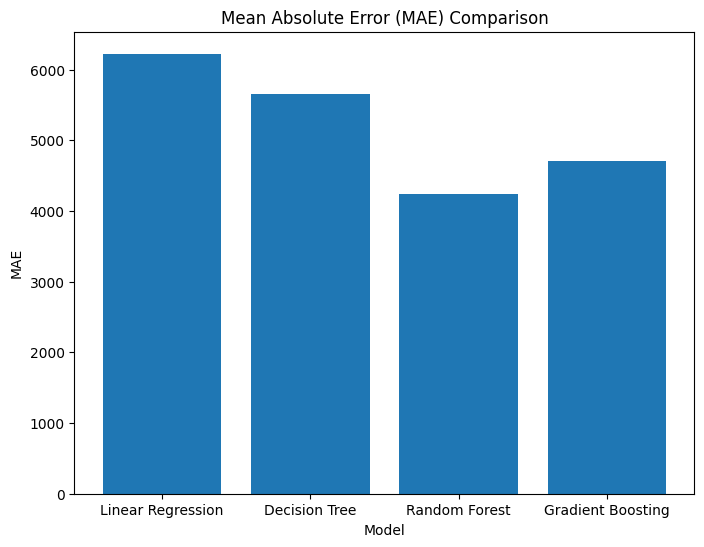

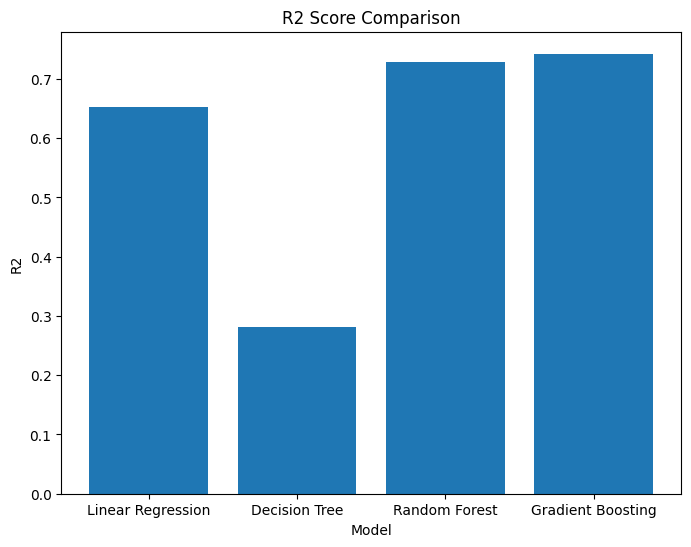

In [ ]:
import matplotlib.pyplot as plt

# Calculate the metrics for each model
mse_values = [metrics['MSE'] for metrics in results.values()]
rmse_values = [metrics['RMSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R2'] for metrics in results.values()]

# Create a bar plot for MSE
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), mse_values)
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')
plt.show()

# Create a bar plot for RMSE
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.show()

# Create a bar plot for MAE
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), mae_values)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.show()

# Create a bar plot for R2
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), r2_values)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 Score Comparison')
plt.show()


In [ ]:
!pip install geopandas

In [ ]:
!pip install folium

<ipython-input-7-69772e045965>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


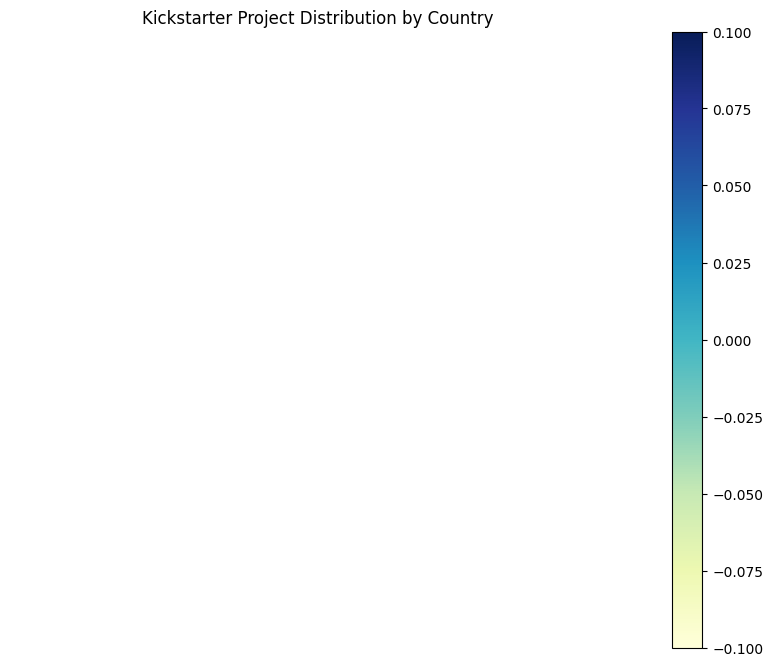

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# Load the Kickstarter dataset with location data

# Read the shapefile for country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group the data by country and calculate the total funding
country_funding = df.groupby('Country')['Pledged'].sum().reset_index()

# Merge the country data with the shapefile based on the country code
merged_data = world.merge(country_funding, left_on='iso_a3', right_on='Country', how='left')

# Visualize the project distribution on a map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='Pledged', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the map
ax.set_title('Kickstarter Project Distribution by Country')
ax.set_axis_off()

# Create an interactive map with folium
m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(geo_data=merged_data, data=merged_data,
                  columns=['iso_a3', 'Pledged'],
                  key_on='feature.properties.iso_a3',
                  fill_color='YlGnBu',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name='Total Funding').add_to(m)

# Display the map
m.save('kickstarter_map2.html')  # Save the map as an HTML file


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Goal', 'Backers']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Explore the cluster assignments
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Perform cluster analysis
cluster_analysis = df.groupby('Cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
0    374752
1        58
2        43
Name: Cluster, dtype: int64
Cluster Analysis:
                   ID          Goal       Pledged       Backers
Cluster                                                        
0        1.074628e+09  3.290368e+04  8.589356e+03     99.864268
1        1.202302e+09  8.342911e+07  6.025000e+02      4.620690
2        1.146446e+09  5.248427e+05  4.654610e+06  59734.860465


<ipython-input-2-b12b6152ac4c>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess the data and select relevant features
X = df[['Goal', 'Pledged', 'Backers']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
cluster_counts = df['Cluster'].value_counts()
cluster_analysis = df.groupby('Cluster').mean()

# Print the results
print("Cluster Counts:")
print(cluster_counts)
print("Cluster Analysis:")
print(cluster_analysis)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Counts:
0    374751
1        58
2        44
Name: Cluster, dtype: int64
Cluster Analysis:
                   ID          Goal       Pledged       Backers
Cluster                                                        
0        1.074635e+09  3.290687e+04  8.452085e+03    100.203388
1        1.202302e+09  8.342911e+07  6.025000e+02      4.620690
2        1.088779e+09  4.865220e+05  5.718161e+06  55491.204545


<ipython-input-3-fa44e9bb752f>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = df.groupby('Cluster').mean()
